In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

px.set_mapbox_access_token('pk.eyJ1IjoiYWxleGFuZHJ1YnVidXJ1emFuIiwiYSI6ImNsMHRzM2g4OTBvbDMzam5tNjh1NjI1ZjgifQ.z7FS1JsvlJhjqCfu1CnRdQ')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def set_seed(SEED):
    os.environ['PYTHONHASHSEED'] = str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)

In [4]:
file_path = './drive/MyDrive/ml-plus-msg/raw_data/Traffic, Investigations _ Other/traffic_stops_philadelphia.csv'
df = pd.read_csv(file_path, parse_dates=['date'])

file_path_crimes = './drive/MyDrive/ml-plus-msg/raw_data/Traffic, Investigations _ Other/crimes.csv'
df_crimes = pd.read_csv(file_path_crimes)

file_path_investigations = './drive/MyDrive/ml-plus-msg/raw_data/Traffic, Investigations _ Other/investigations.csv'
df_investigations = pd.read_csv(file_path_investigations, parse_dates=['datetimeoccur'])

file_path_population = './drive/MyDrive/ml-plus-msg/raw_data/Traffic, Investigations _ Other/philadelphia_population_metrics.csv'
df_population = pd.read_csv(file_path_population)
df_population = df_population.set_index('GEOGRAPHY_NAME')

<ipython-input-4-776a34bf1c2a>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['date'])


In [5]:
df = df[~df['fips'].isnull()]
df.loc[:, 'fips'] = df['fips'].astype(int) // 10

<ipython-input-5-b2860de0829a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'fips'] = df['fips'].astype(int) // 10


In [6]:
temp_df = df[['fips', 'lat', 'lng']]
temp_df = temp_df.groupby('fips').mean()

In [7]:
temp_df

,lat,lng
fips,,
42017100000,40.124463,-75.005050
42017101401,40.134364,-75.009096
42045400000,39.933080,-75.238450
42045402100,39.933061,-75.238397
42045980000,39.875032,-75.215828
...,...,...
42101980600,39.905573,-75.171110
42101980700,39.918671,-75.147266
42101980800,39.970298,-75.253865


In [8]:
selected_columns = ['COUNT_ALL_RACES_ETHNICITIES', 'COUNT_WHITE_NH', 'COUNT_BLACK_NH',
                    'COUNT_ASIAN_NH', 'COUNT_HISPANIC', 'PERCENT_WHITE_NH', 'PERCENT_BLACK_NH', 
                    'PERCENT_ASIAN_NH', 'PERCENT_HISPANIC']
temp_df.loc[df_population.index, selected_columns] = df_population.loc[df_population.index, selected_columns]
temp_df = temp_df.dropna()

In [9]:
temp_df

,lat,lng,COUNT_ALL_RACES_ETHNICITIES,COUNT_WHITE_NH,COUNT_BLACK_NH,COUNT_ASIAN_NH,COUNT_HISPANIC,PERCENT_WHITE_NH,PERCENT_BLACK_NH,PERCENT_ASIAN_NH,PERCENT_HISPANIC
fips,,,,,,,,,,,
42101000100,39.951517,-75.146664,3478.0,2890.0,207.0,173.0,126.0,83.093732,5.951696,4.974123,3.622772
42101000200,39.955618,-75.156031,2937.0,665.0,284.0,1855.0,79.0,22.642152,9.669731,63.159687,2.689820
42101000300,39.956755,-75.168328,3169.0,2290.0,324.0,328.0,135.0,72.262543,10.224045,10.350268,4.260019
42101000401,39.953899,-75.174938,2125.0,1049.0,376.0,519.0,107.0,49.364706,17.694118,24.423529,5.035294
42101000402,39.953136,-75.167186,3142.0,2455.0,173.0,356.0,109.0,78.134946,5.506047,11.330363,3.469128
...,...,...,...,...,...,...,...,...,...,...,...
42101980300,40.083849,-75.007891,2.0,2.0,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000
42101980700,39.918671,-75.147266,5.0,0.0,3.0,1.0,1.0,0.000000,60.000000,20.000000,20.000000
42101980800,39.970298,-75.253865,6.0,4.0,1.0,0.0,0.0,66.666667,16.666667,0.000000,0.000000


In [10]:
temp_df.to_csv('philadelphia_population_metrics_coords.csv')

In [ ]:
temp_df

,lat,lng,COUNT_ALL_RACES_ETHNICITIES,COUNT_WHITE_NH,COUNT_BLACK_NH,COUNT_ASIAN_NH,COUNT_HISPANIC,PERCENT_WHITE_NH,PERCENT_BLACK_NH,PERCENT_ASIAN_NH,PERCENT_HISPANIC
fips,,,,,,,,,,,
42101000100,39.951517,-75.146664,3478.0,2890.0,207.0,173.0,126.0,83.093732,5.951696,4.974123,3.622772
42101000200,39.955618,-75.156031,2937.0,665.0,284.0,1855.0,79.0,22.642152,9.669731,63.159687,2.689820
42101000300,39.956755,-75.168328,3169.0,2290.0,324.0,328.0,135.0,72.262543,10.224045,10.350268,4.260019
42101000401,39.953899,-75.174938,2125.0,1049.0,376.0,519.0,107.0,49.364706,17.694118,24.423529,5.035294
42101000402,39.953136,-75.167186,3142.0,2455.0,173.0,356.0,109.0,78.134946,5.506047,11.330363,3.469128
...,...,...,...,...,...,...,...,...,...,...,...
42101980300,40.083849,-75.007891,2.0,2.0,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000
42101980700,39.918671,-75.147266,5.0,0.0,3.0,1.0,1.0,0.000000,60.000000,20.000000,20.000000
42101980800,39.970298,-75.253865,6.0,4.0,1.0,0.0,0.0,66.666667,16.666667,0.000000,0.000000


In [ ]:
df

,objectid,date,time,location,lat,lng,district,service_area,subject_age,subject_race,...,outcome,contraband_found,frisk_performed,search_conducted,search_person,search_vehicle,raw_race,raw_individual_contraband,raw_vehicle_contraband,fips
2,3,2014-01-01,03:30:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,24.0,black,...,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False,42101036900
3,4,2014-01-01,03:40:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,20.0,black,...,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False,42101036900
4,5,2014-01-01,08:30:00,N 56TH ST / UPLAND WAY,39.983712,-75.234188,19.0,193,31.0,black,...,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False,42101011800
5,6,2014-01-01,08:53:00,CHESTNUT ST / S SCHUYLKILL AV W,39.953124,-75.181936,18.0,181,38.0,black,...,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False,42101036900
6,7,2014-01-01,09:00:00,N 52ND ST / GAINOR RD,39.989757,-75.229019,19.0,193,19.0,black,...,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False,42101011900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865091,1865092,2018-04-14,21:36:00,S 59TH ST / ELMWOOD AV,39.928080,-75.221960,12.0,123,60.0,black,...,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False,42101006700
1865092,1865093,2018-04-14,22:01:00,2600 BLOCK JUDSON ST,39.998240,-75.175190,39.0,393,33.0,asian/pacific islander,...,NaN,NaN,False,False,False,False,Asian,False,False,42101017202
1865093,1865094,2018-04-14,22:48:00,500 BLOCK E OLNEY AV,40.033810,-75.114430,35.0,352,21.0,black,...,arrest,False,True,True,True,False,Black - Non-Latino,False,False,42101029000
1865094,1865095,2018-04-14,22:48:00,500 BLOCK E OLNEY AV,40.033810,-75.114430,35.0,352,22.0,black,...,arrest,False,True,True,True,False,Black - Non-Latino,False,False,42101029000


In [11]:
from tqdm.notebook import tqdm

# Function to calculate haversine distance between two points
def haversine(lat1, lng1, lat2, lng2):
    R = 6371  # Earth radius in km

    lat1, lng1, lat2, lng2 = map(np.radians, [lat1, lng1, lat2, lng2])

    dlat = lat2 - lat1
    dlng = lng2 - lng1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlng/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

# Loop through each row in df and find the closest point in df_temp
bad_fips = df[~df['fips'].isin(temp_df.index)]
for i, row in tqdm(bad_fips.iterrows(), total=len(bad_fips)):
    lat, lng = row['lat'], row['lng']
    distances = [haversine(lat, lng, row_temp['lat'], row_temp['lng']) for _, row_temp in temp_df.iterrows()]
    closest_idx = np.argmin(distances)
    closest_geoid = temp_df.index[closest_idx]
    df.loc[i, 'fips'] = closest_geoid

  0%|          | 0/82448 [00:00<?, ?it/s]

In [12]:
df.to_csv('./drive/MyDrive/ml-plus-msg/raw_data/stops_fix_fips.csv')

In [ ]:
fig = px.scatter_mapbox(temp_df.dropna(), lat="lat", lon="lng", size='COUNT_BLACK_NH', size_max=10, zoom=10)
fig.show()

sz = temp_df['COUNT_WHITE_NH'].max() / temp_df['COUNT_BLACK_NH'].max() * 10
fig = px.scatter_mapbox(temp_df.dropna(), lat="lat", lon="lng", size='COUNT_WHITE_NH', size_max=sz, zoom=10)
fig.show()

sz = temp_df['COUNT_HISPANIC'].max() / temp_df['COUNT_BLACK_NH'].max() * 10
fig = px.scatter_mapbox(temp_df.dropna(), lat="lat", lon="lng", size='COUNT_HISPANIC', size_max=sz, zoom=10)
fig.show()

sz = temp_df['COUNT_ASIAN_NH'].max() / temp_df['COUNT_BLACK_NH'].max() * 10
fig = px.scatter_mapbox(temp_df.dropna(), lat="lat", lon="lng", size='COUNT_ASIAN_NH', size_max=sz, zoom=10)
fig.show()

9.596037765051848


7.853273487076304


3.6449466026930817


In [ ]:
no = []
for f in fips:
    if f not in df_population['GEOGRAPHY_NAME'].values:
        no.append(f)

In [ ]:
no

[42091204300,
 42091205503,
 42091204500,
 42091202500,
 42091202202,
 42091205400,
 42091202201,
 42091210500,
 42017101401,
 42091202402,
 42045402100,
 42091201501,
 42091202401,
 42091200104,
 42091210300,
 42045980000,
 42101000000,
 42091200000,
 42017100000,
 42045400000,
 42091210400]

,objectid,date,time,location,lat,lng,district,service_area,subject_age,subject_race,...,outcome,contraband_found,frisk_performed,search_conducted,search_person,search_vehicle,raw_race,raw_individual_contraband,raw_vehicle_contraband,fips
62,63,2014-01-02,01:40:00,BELMONT AV / CITY AV,40.003934,-75.220698,19.0,192,18.0,black,...,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False,42091204300
384,385,2014-01-08,13:30:00,N 50TH ST / CITY AV,40.000326,-75.228378,19.0,192,28.0,black,...,arrest,True,False,True,True,False,Black - Non-Latino,True,False,42091204300
502,503,2014-01-09,18:30:00,CITY AV / HAVERFORD AV,39.980180,-75.269272,19.0,191,24.0,black,...,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False,42091205503
1791,1792,2014-01-20,09:40:00,CITY AV / GOLF RD,39.999820,-75.229455,19.0,193,18.0,black,...,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False,42091204300
1792,1793,2014-01-20,09:40:00,CITY AV / GOLF RD,39.999820,-75.229455,19.0,193,20.0,black,...,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False,42091204300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865048,1865049,2018-04-14,21:00:00,1900 BLOCK WASHINGTON AV,39.938800,-75.174810,17.0,171,31.0,black,...,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False,42101000000
1865051,1865052,2018-04-14,21:00:00,600 BLOCK S 11TH ST,39.942990,-75.160260,3.0,031,47.0,asian/pacific islander,...,NaN,NaN,False,False,False,False,Asian,False,False,42101000000
1865074,1865075,2018-04-14,21:17:00,S 27TH ST / TASKER ST,39.933240,-75.189690,17.0,172,41.0,black,...,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False,42101000000
1865075,1865076,2018-04-14,21:19:00,500 BLOCK WASHINGTON AV,39.934690,-75.152380,3.0,031,35.0,black,...,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False,42101000000


In [ ]:
df.isnull().sum() * 100 / len(df)

objectid                      0.000000
date                          0.000000
time                          0.000000
location                      2.010620
lat                           5.613491
lng                           5.613491
district                      0.000054
service_area                  0.000214
subject_age                   0.244438
subject_race                  0.000000
subject_sex                   0.034851
type                          0.000000
arrest_made                   0.000000
outcome                      94.880907
contraband_found             93.756085
frisk_performed               0.000000
search_conducted              0.000000
search_person                 0.000000
search_vehicle                0.000000
raw_race                      0.000000
raw_individual_contraband     0.000000
raw_vehicle_contraband        0.000000
fips                          5.613491
dtype: float64

**outcome** if None means arrest_made is false

In [ ]:
## total stops through years
import plotly.express as px

temp_df = df[['date','objectid']].groupby('date').count().reset_index()
temp_df.rename(columns={'objectid':'total'},inplace=True)
temp_df['year'] = temp_df['date'].dt.year

fig = px.line(temp_df, x="date", y="total", color='year')
fig.update_layout(
    xaxis_title="Date", yaxis_title="Total stops"
)
fig.show()


In [ ]:
## total stops through years
import plotly.express as px
temp_df = df_investigations[['id']]
temp_df['date'] = df_investigations['datetimeoccur'].dt.date

temp_df = temp_df.groupby('date').count().reset_index()
temp_df.rename(columns={'id':'total'},inplace=True)

fig = px.line(temp_df, x="date", y="total")#, color='year')
fig.update_layout(
    xaxis_title="Date", yaxis_title="Total investigations"
)
fig.show()


<ipython-input-23-ebe28e9484fa>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
temp_df = df[['date','objectid', 'subject_race']]
temp_df['date'] = temp_df['date'].apply(lambda x: f"{x.year}-{x.month}")
temp_df = temp_df.groupby(['date', 'subject_race']).count().sort_values('objectid', ascending=False).reset_index()
temp_df.rename(columns={'objectid':'total'}, inplace=True)

fig = px.bar(temp_df, x="date", y="total", color="subject_race", title="Monthly stops given subject race")

fig.update_layout(
    xaxis_title="Date", yaxis_title="Total stops"
)

fig.show()

<ipython-input-58-25e7c28dab89>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:


temp_df = df_investigations[df_investigations['datetimeoccur'].dt.year < df['date'].dt.year.max()][['datetimeoccur','id', 'race']]
temp_df['datetimeoccur'] = temp_df['datetimeoccur'].apply(lambda x: f"{x.year}-{x.month}")
temp_df = temp_df.groupby(['datetimeoccur', 'race']).count().sort_values('id', ascending=False).reset_index()
temp_df.rename(columns={'id':'total'}, inplace=True)

fig = px.bar(temp_df, x="datetimeoccur", y="total", color="race", title="Monthly investigations given subject race")

fig.update_layout(
    xaxis_title="Date", yaxis_title="Total investigations"
)

fig.show()

In [ ]:
set_seed(1337)
df2 = df.sample(30000)
df2['arrest_made'] = df2['arrest_made'] * 4 + 1

fig = px.scatter_mapbox(df2, lat="lat", lon="lng", color="subject_race", size="arrest_made", size_max=5, zoom=10, title="Stops given subject race")
fig.show()

# Hotspot analysis

In [ ]:
set_seed(1337)
px.density_mapbox(temp_df[~temp_df['fips'].isin(no)].sample(30000), lat='lat', lon='lng', radius=2, zoom=10)

In [ ]:
set_seed(1337)
px.density_mapbox(df.sample(30000), lat='lat', lon='lng', radius=2, zoom=10)

# Causal discovery

In [ ]:
!pip install causal-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df['subject_race'].unique()

array(['black', 'white', 'hispanic', 'unknown', 'asian/pacific islander',
       'other'], dtype=object)

In [ ]:
df_causal = df.loc[:, ['arrest_made', 'raw_vehicle_contraband', 'raw_individual_contraband', 'search_person', 'search_vehicle']]

df_causal['is_black'] = (df['subject_race'] == 'black')
df_causal['is_white'] = (df['subject_race'] == 'white')
# df_causal['is_hispanic'] = (df['subject_race'] == 'hispanic')

df_causal['is_pedestrian'] = (df['type'] == 'pedestrian')
# df_causal['is_vehicle'] = (df['type'] == 'vehicular')

In [ ]:
df_causal

,arrest_made,raw_vehicle_contraband,raw_individual_contraband,search_person,search_vehicle,is_black,is_white,is_pedestrian
objectid,,,,,,,,
1,True,False,True,True,False,True,False,True
2,True,False,False,True,False,True,False,True
3,False,False,False,False,False,True,False,True
4,False,False,False,False,False,True,False,True
5,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...
1865092,False,False,False,False,False,True,False,True
1865093,False,False,False,False,False,False,False,True
1865094,True,False,False,True,False,True,False,False


In [ ]:
df_causal = df_causal.dropna()#.sample(10000)
data = df_causal.to_numpy().astype(bool)

In [ ]:
data.shape

(1865096, 8)

  0%|          | 0/8 [00:00<?, ?it/s]

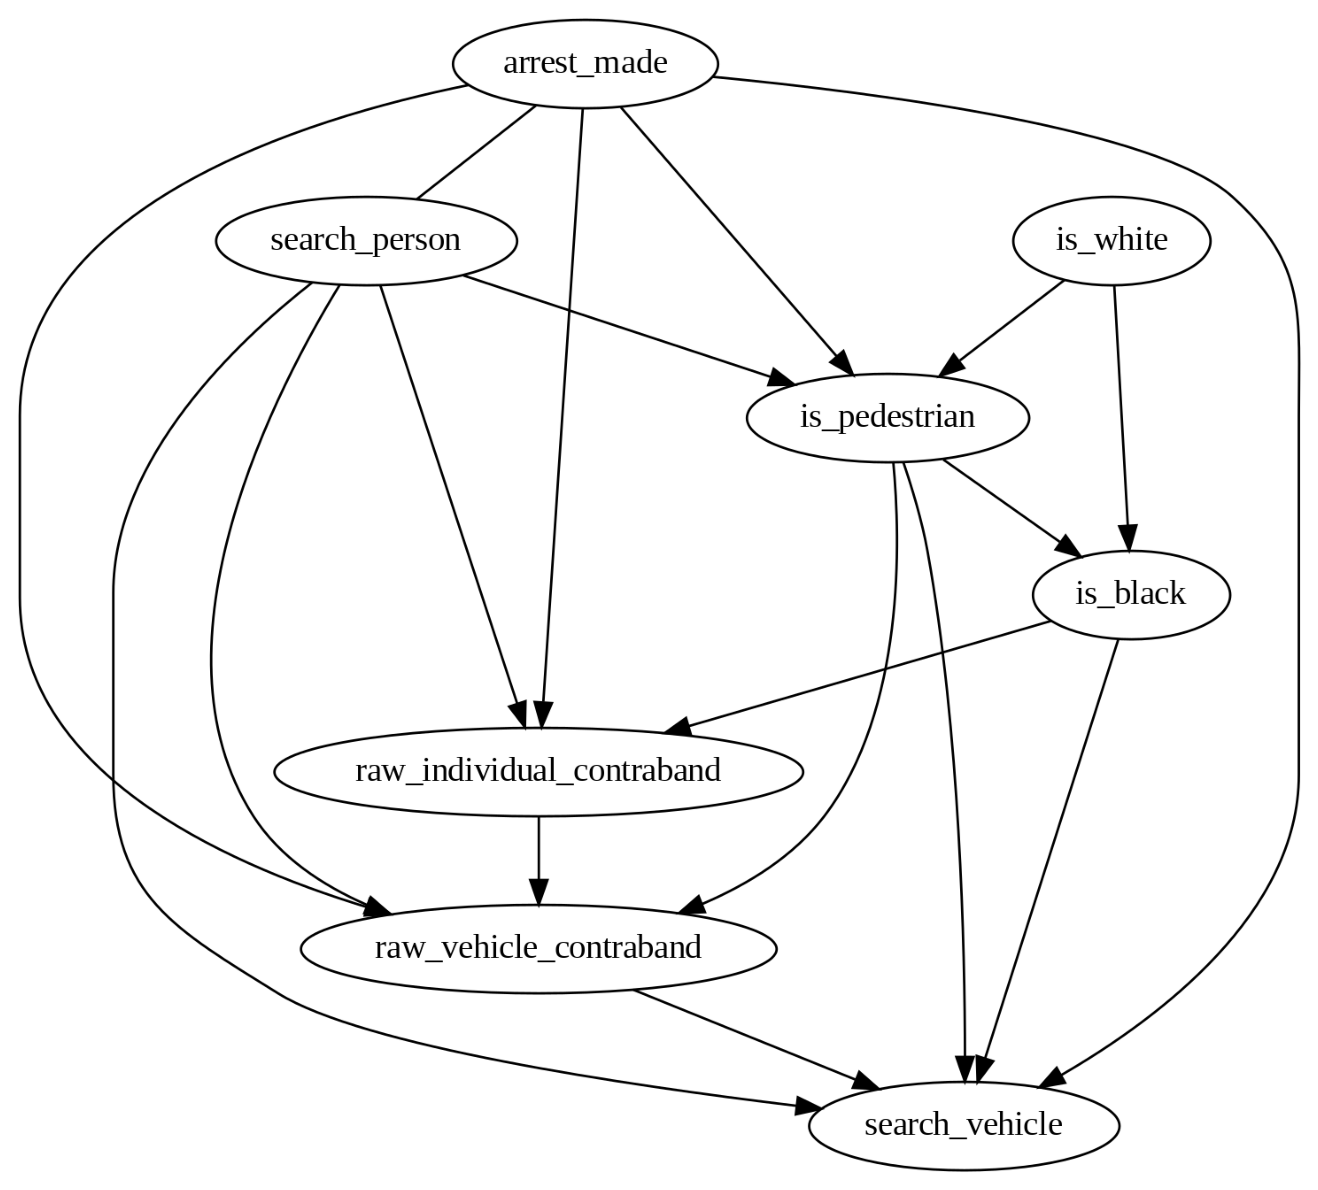

In [ ]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.FCI import fci

from causallearn.utils.cit import kci

cg = pc(data)

cg.draw_pydot_graph(labels=df_causal.columns)
# or customized parameters
# cg, _ = fci(data)


In [ ]:
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg)
pyd.write_png('simple_test.png')